## STEPS FOR INSTALLING *fastai v2*.
\[DID NOT WORK\] Installation command from [docs.fast.ai](https://docs.fast.ai/)
```
conda install -c fastai -c pytorch -c anaconda fastai gh anaconda
```

\[DID NOT WORK - numpy installed through this has issues\] Installation command from [this article](https://medium.com/@pierre_guillou/how-to-install-fastai-v1-on-windows-10-ca1bc370dce4)
```
conda install fastai pytorch -c fastai -c pytorch -c conda-forge
```

### \[WORKING\] Install pytorch via conda and fastai via pip; Install ipywidgets also
```
conda install pytorch torchvision cudatoolkit=10.1 -c pytorch
pip install fastai
conda install -c conda-forge ipywidgets
conda install -c anaconda ipykernel
python -m ipykernel install --user --name=env_fastai_v2
```

In [1]:
import fastai
print('fastai : version {}'.format(fastai.__version__))

fastai : version 2.0.16


In [2]:
from fastai.vision.all import *
import re

In [3]:
def seed_everything(seed=1234):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed) # gpu vars
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed=1234
seed_everything(seed=seed)

In [4]:
def get_modeldir(model='modelname', experiment='bla', ver='v0.0'):
    return '../inputs_outputs/models/' + model + '_' + experiment + '_' + ver

get_modeldir = partial(get_modeldir, experiment='', ver='v1.0')

In [5]:
path = Path("../inputs_outputs/datasets_train_test/vjump_dataset")
path.ls()

(#2) [Path('../inputs_outputs/datasets_train_test/vjump_dataset/test'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/train')]

In [6]:
(path/"train").ls()

(#4) [Path('../inputs_outputs/datasets_train_test/vjump_dataset/train/jump_peak'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/train/landing'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/train/squat'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/train/transition')]

In [7]:
get_image_files(path/"train")

(#4651) [Path('../inputs_outputs/datasets_train_test/vjump_dataset/train/jump_peak/20200918_161843_FRAME_63_jump_peak.png'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/train/jump_peak/20200918_161843_FRAME_64_jump_peak.png'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/train/jump_peak/20200918_161843_FRAME_65_jump_peak.png'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/train/jump_peak/20200918_161843_FRAME_66_jump_peak.png'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/train/jump_peak/20200918_161843_FRAME_67_jump_peak.png'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/train/jump_peak/20200918_161843_FRAME_68_jump_peak.png'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/train/jump_peak/20200918_161843_FRAME_69_jump_peak.png'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/train/jump_peak/20200918_161843_FRAME_71_jump_peak.png'),Path('../inputs_outputs/datasets_train_test/vjump_dataset/train/jump_pe

In [8]:
verify_images(get_image_files(path/"train"))

(#0) []

In [11]:
# Run this to remove any files in the dataset that fail verification (ie. they're not images).

# failed = verify_images(get_image_files(path/"train"))
# failed.map((path/"train").unlink)

In [12]:
data_block = DataBlock(blocks=(ImageBlock, CategoryBlock),
                       get_items=get_image_files,
                       get_y=parent_label,
                       splitter=RandomSplitter(seed=42),   # valid_pct=0.2 by default
                       item_tfms=RandomResizedCrop(size=460, min_scale=0.5),
                       batch_tfms=aug_transforms(size=224,
                                                 max_rotate = 0.1, 
                                                 max_zoom = 0.2, 
                                                 max_lighting = 0.2, 
                                                 max_warp=0.0
                                                )
                      )

DataBlock collates batches of images (according to the ```bs``` para in DataLoader) before putting them through the DataLoader. This is done on the CPU.
DataLoader loads the batch of images onto the GPU (if available) and then splits the batch into training and validation sets before training the model. 

```item_tfms``` transforms each individual image (still on the CPU), while ```batch_tfms``` transforms all the images in the batch (on the GPU, if available). Transformation on GPU tends to be faster than on the CPU, especially for batches of images.

In [13]:
dls = data_block.dataloaders(path/"train", num_workers=0, bs=32)

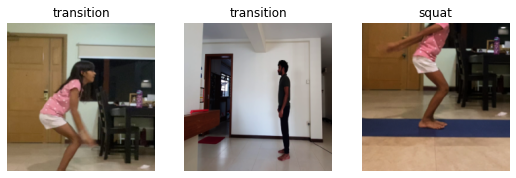

In [14]:
dls.show_batch(nrows=1, ncols=3)

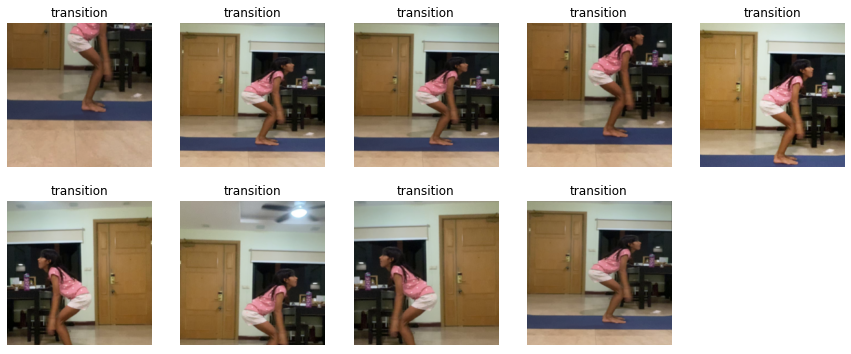

In [15]:
dls.show_batch(nrows=2, ncols=5, unique=True)

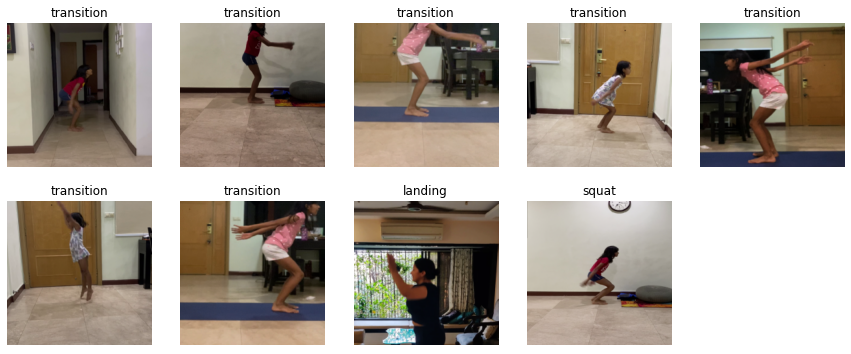

In [16]:
dls.show_batch(nrows=2, ncols=5, unique=False)

## ResNet (part of fastai's default model zoo)

In [17]:
# import torchvision.models as models
# resnet34 = models.resnet34(pretrained=True)
# resnet34

In [18]:
# fastai_resnet34 = fastai.vision.models.resnet34(pretrained=True)
# str(fastai_resnet34) == str(resnet34)

In [19]:
# Default ResNet34 model in fastai library.
type(resnet34())

torchvision.models.resnet.ResNet

In [20]:
resnet34()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [21]:
model = "resnet34"
get_modeldir = partial(get_modeldir, model=model, experiment='', ver='v1.0')
modeldir = get_modeldir()

learn = cnn_learner(dls, resnet34, metrics=error_rate, model_dir=modeldir, splitter=None)

In [22]:
# ResNet34 model gets assigned to the learner.
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [23]:
len(learn.model)

# The fastai model is split into two different layer groups:
# - Group 1: Our encoder, which is everything but the last layer of our original model.
# - Group 2: Our head, which is a fastai version of a Linear layer plus a few extra bits.

2

In [24]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [25]:
learn.summary()

Sequential (Input shape: ['32 x 3 x 224 x 224'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               32 x 64 x 112 x 112  9,408      False     
________________________________________________________________
BatchNorm2d          32 x 64 x 112 x 112  128        True      
________________________________________________________________
ReLU                 32 x 64 x 112 x 112  0          False     
________________________________________________________________
MaxPool2d            32 x 64 x 56 x 56    0          False     
________________________________________________________________
Conv2d               32 x 64 x 56 x 56    36,864     False     
________________________________________________________________
BatchNorm2d          32 x 64 x 56 x 56    128        True      
________________________________________________________________
ReLU                 32 x 64 x 56 x 56    0          False     
_________________________________________________

Internal workings of ```learn.fine_tune()```:
1. ```self.freeze()``` --> freezes the entire architecture except the last layer
2. ```self.fit_one_cycle()``` for ```freeze_epochs=1``` to learn the weights only on the last layer --> so now all layers except last have pre-trained weights and last layer's weights have been tuned for this particular dataset
3. ```base_lr/=2``` --> divides learning rate by 2
4. ```self.unfreeze()``` --> unfreezes the entire architecture
5. ```self.fit_one_cycle()``` for epochs=X (whatever the user input is)

In [26]:
learn.fine_tune(2)

In [27]:
interp = ClassificationInterpretation.from_learner(learn)

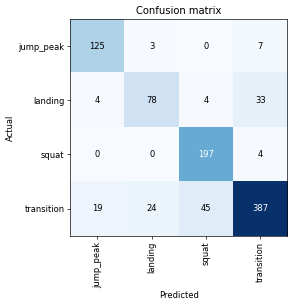

In [28]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [29]:
interp.most_confused()

[('transition', 'squat', 45),
 ('landing', 'transition', 33),
 ('transition', 'landing', 24),
 ('transition', 'jump_peak', 19),
 ('jump_peak', 'transition', 7),
 ('landing', 'jump_peak', 4),
 ('landing', 'squat', 4),
 ('squat', 'transition', 4),
 ('jump_peak', 'landing', 3)]

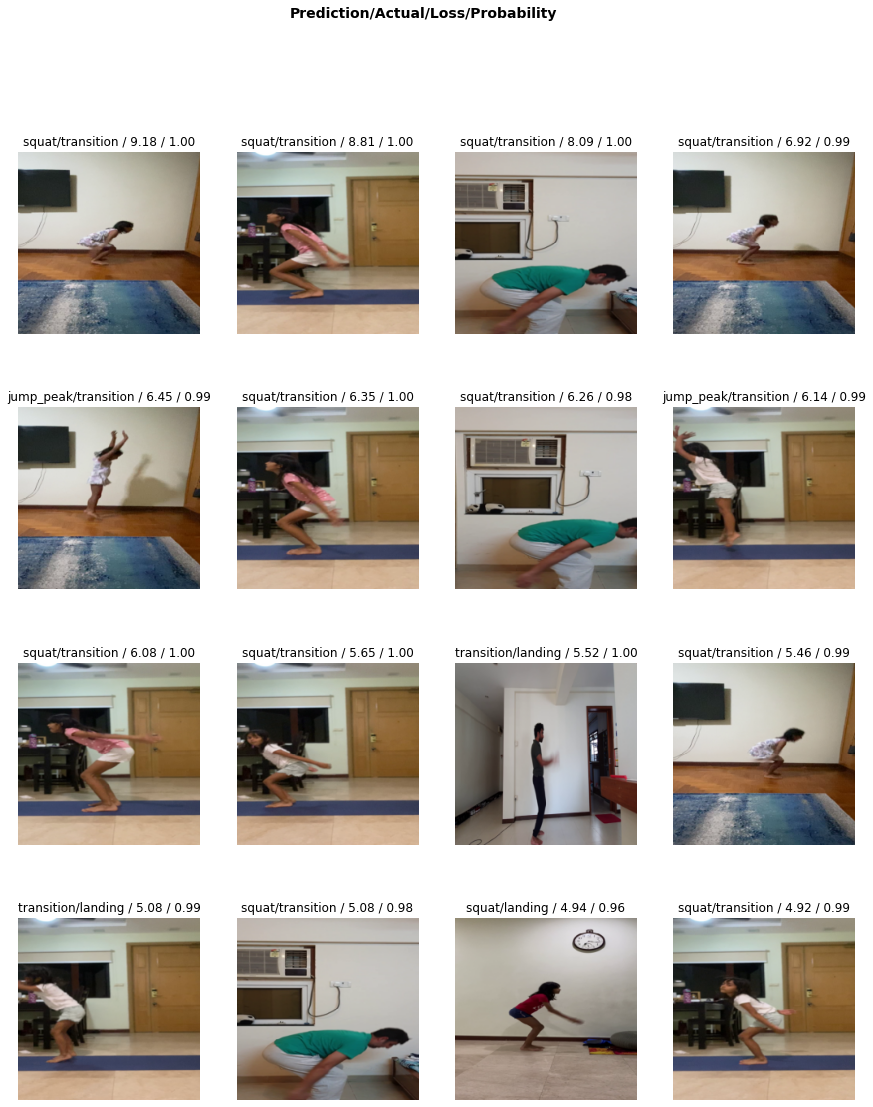

In [30]:
interp.plot_top_losses(16, figsize=(15, 18))

AttributeError: 'AxesImage' object has no property 'heatmap'

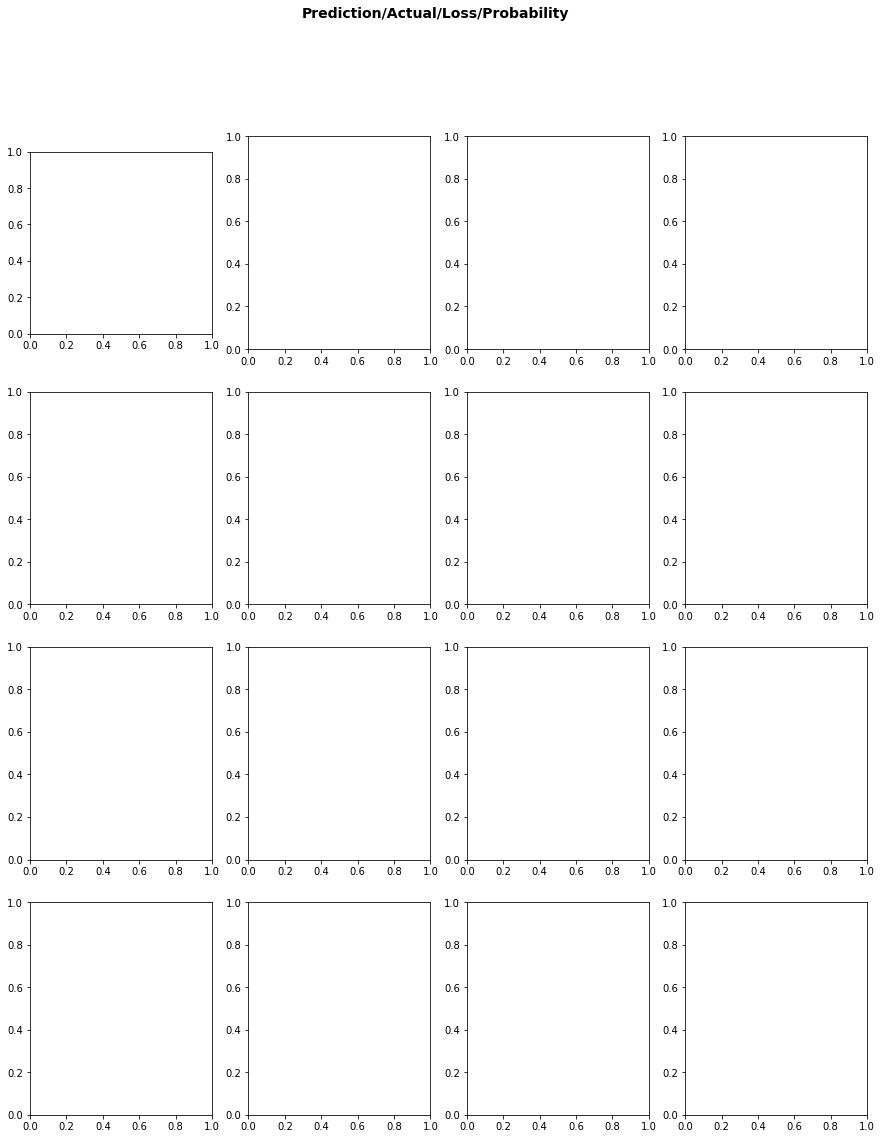

In [31]:
interp.plot_top_losses(16, figsize=(15, 18), heatmap=True)

Minimum/10: 1.58e-03, steepest point: 7.59e-07


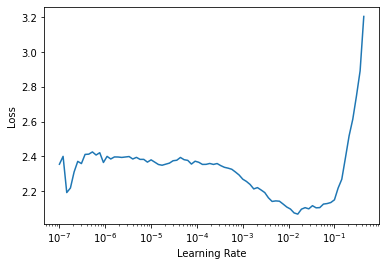

In [32]:
modeldir = get_modeldir(ver='v2.0')

learn = cnn_learner(dls, resnet34, metrics=error_rate, model_dir=modeldir)
lr_min, lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [33]:
modeldir = get_modeldir(ver='v3.0')

# callbacks = [SaveModelCallback(learn, monitor='accuracy',mode='max',name=modeldir + '_st1')]
callbacks = [SaveModelCallback(monitor='accuracy', fname=modeldir+"_savemodel")]
learn.callbacks = callbacks

learn = cnn_learner(dls, resnet34, metrics=error_rate, model_dir=modeldir)
learn.fine_tune(7, base_lr=1.58e-3)    # 7th epoch gives best eror_rate without over-fitting.

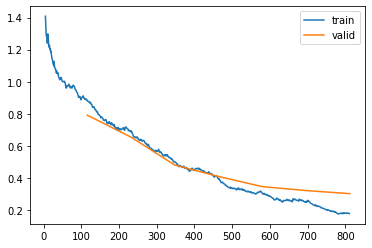

In [34]:
learn.recorder.plot_loss()

In [35]:
preds, y, losses = learn.get_preds(with_loss=True)

In [36]:
preds.shape

torch.Size([930, 4])

In [37]:
y.shape

torch.Size([930])

In [38]:
losses.shape

torch.Size([930])

In [39]:
interp = ClassificationInterpretation.from_learner(learn)

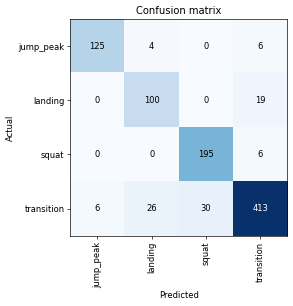

In [40]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

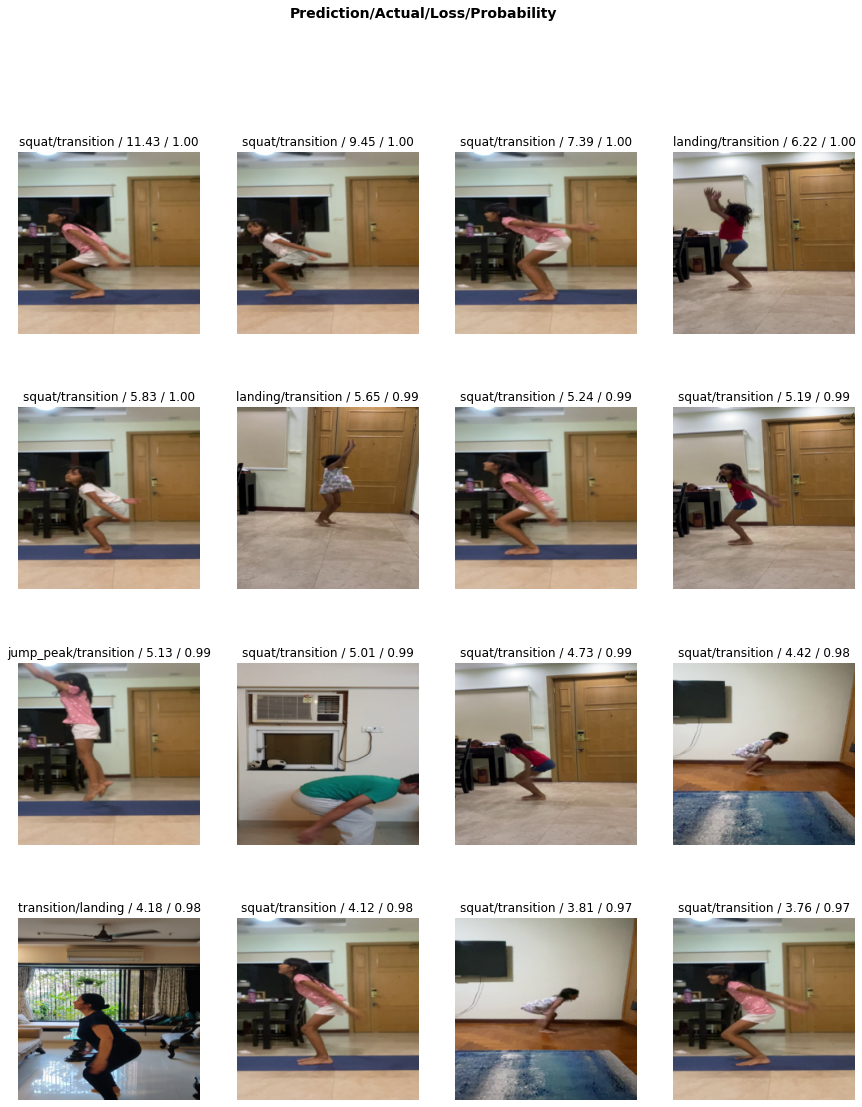

In [41]:
interp.plot_top_losses(16, figsize=(15, 18))

In [42]:
# cleaner = ImageClassifierCleaner(learn)
# cleaner

In [43]:
learn.export(fname=f"{modeldir}.pkl")

In [44]:
learn_inf = load_learner(f"{modeldir}.pkl")

In [45]:
learn_inf.dls.vocab

['jump_peak', 'landing', 'squat', 'transition']

In [47]:
learn_inf.predict((path/"test").ls()[0])

('transition',
 tensor(3),
 tensor([4.9676e-03, 5.8041e-03, 6.6821e-04, 9.8856e-01]))

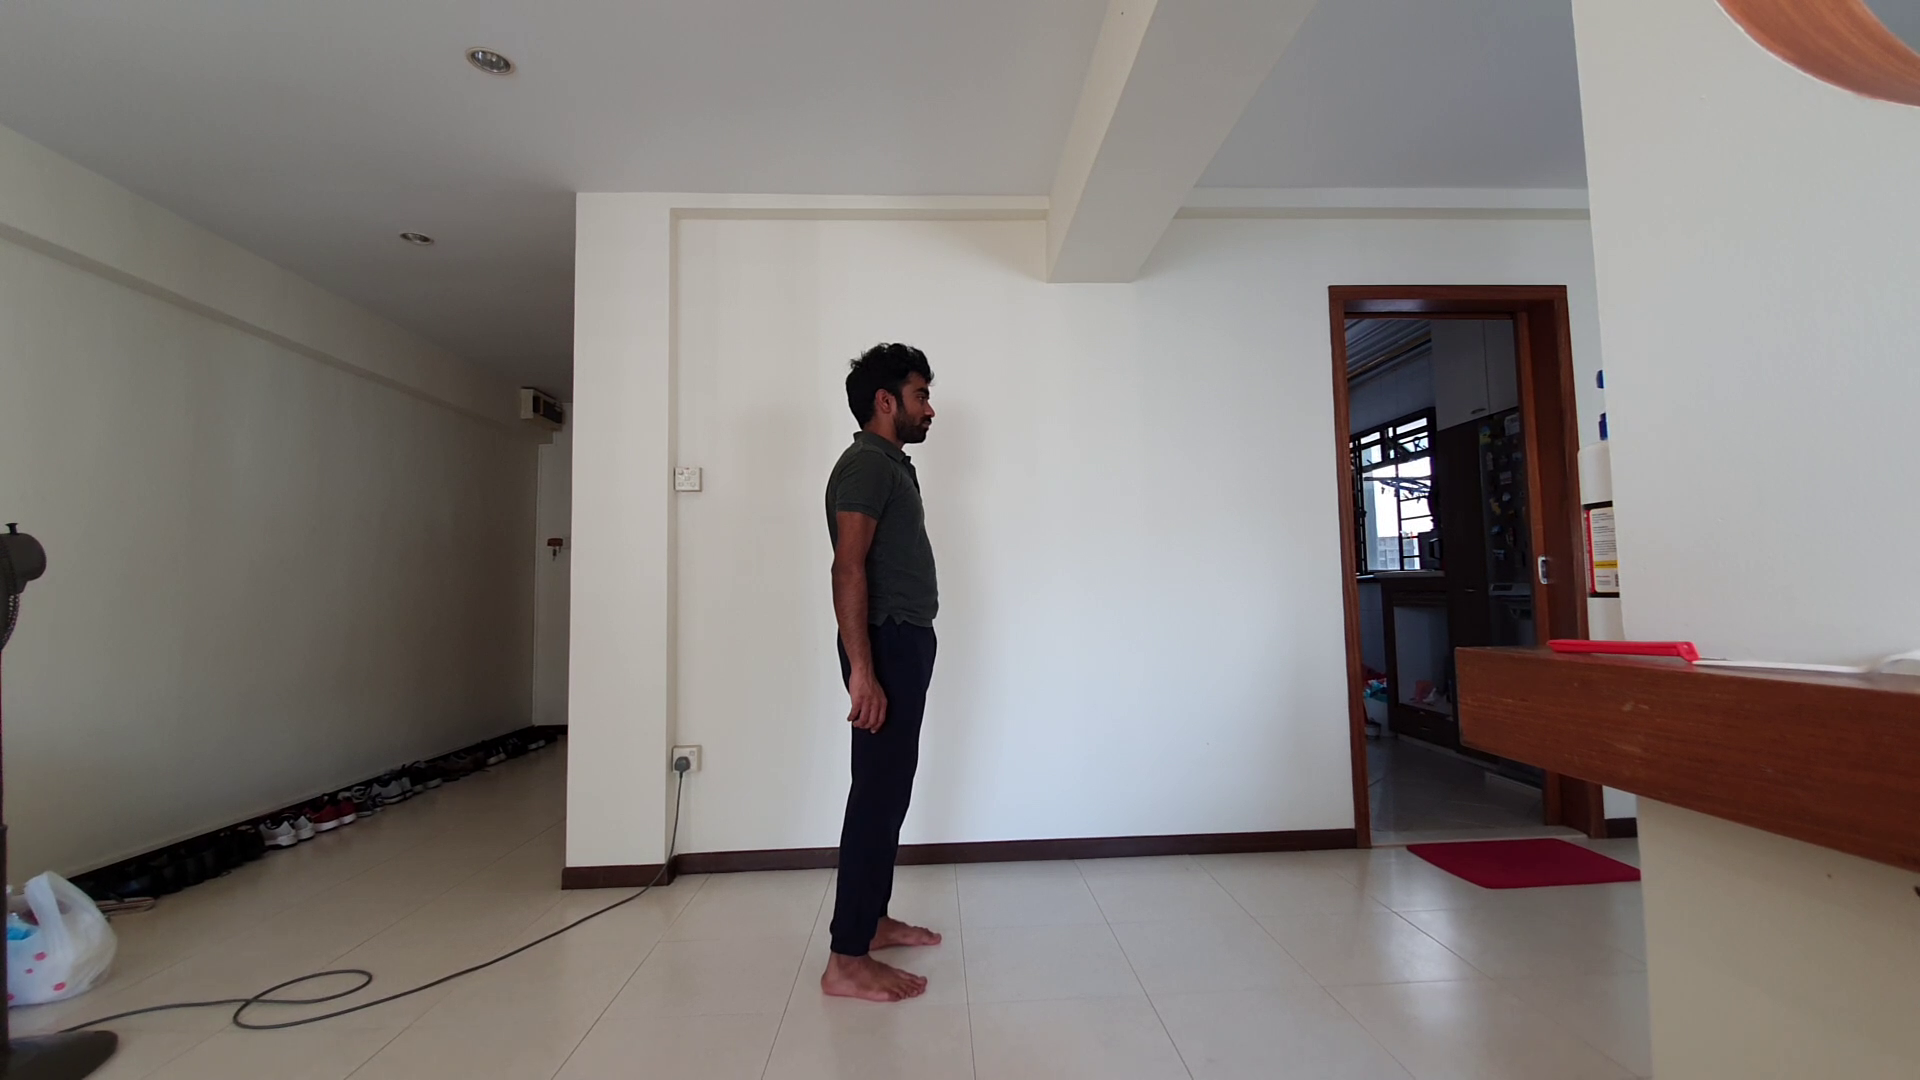

In [48]:
im = load_image((path/"test").ls()[0])
im

In [49]:
learn_inf.predict((path/"test").ls()[-1])

('squat', tensor(2), tensor([2.8019e-03, 8.0050e-04, 9.9635e-01, 4.8712e-05]))

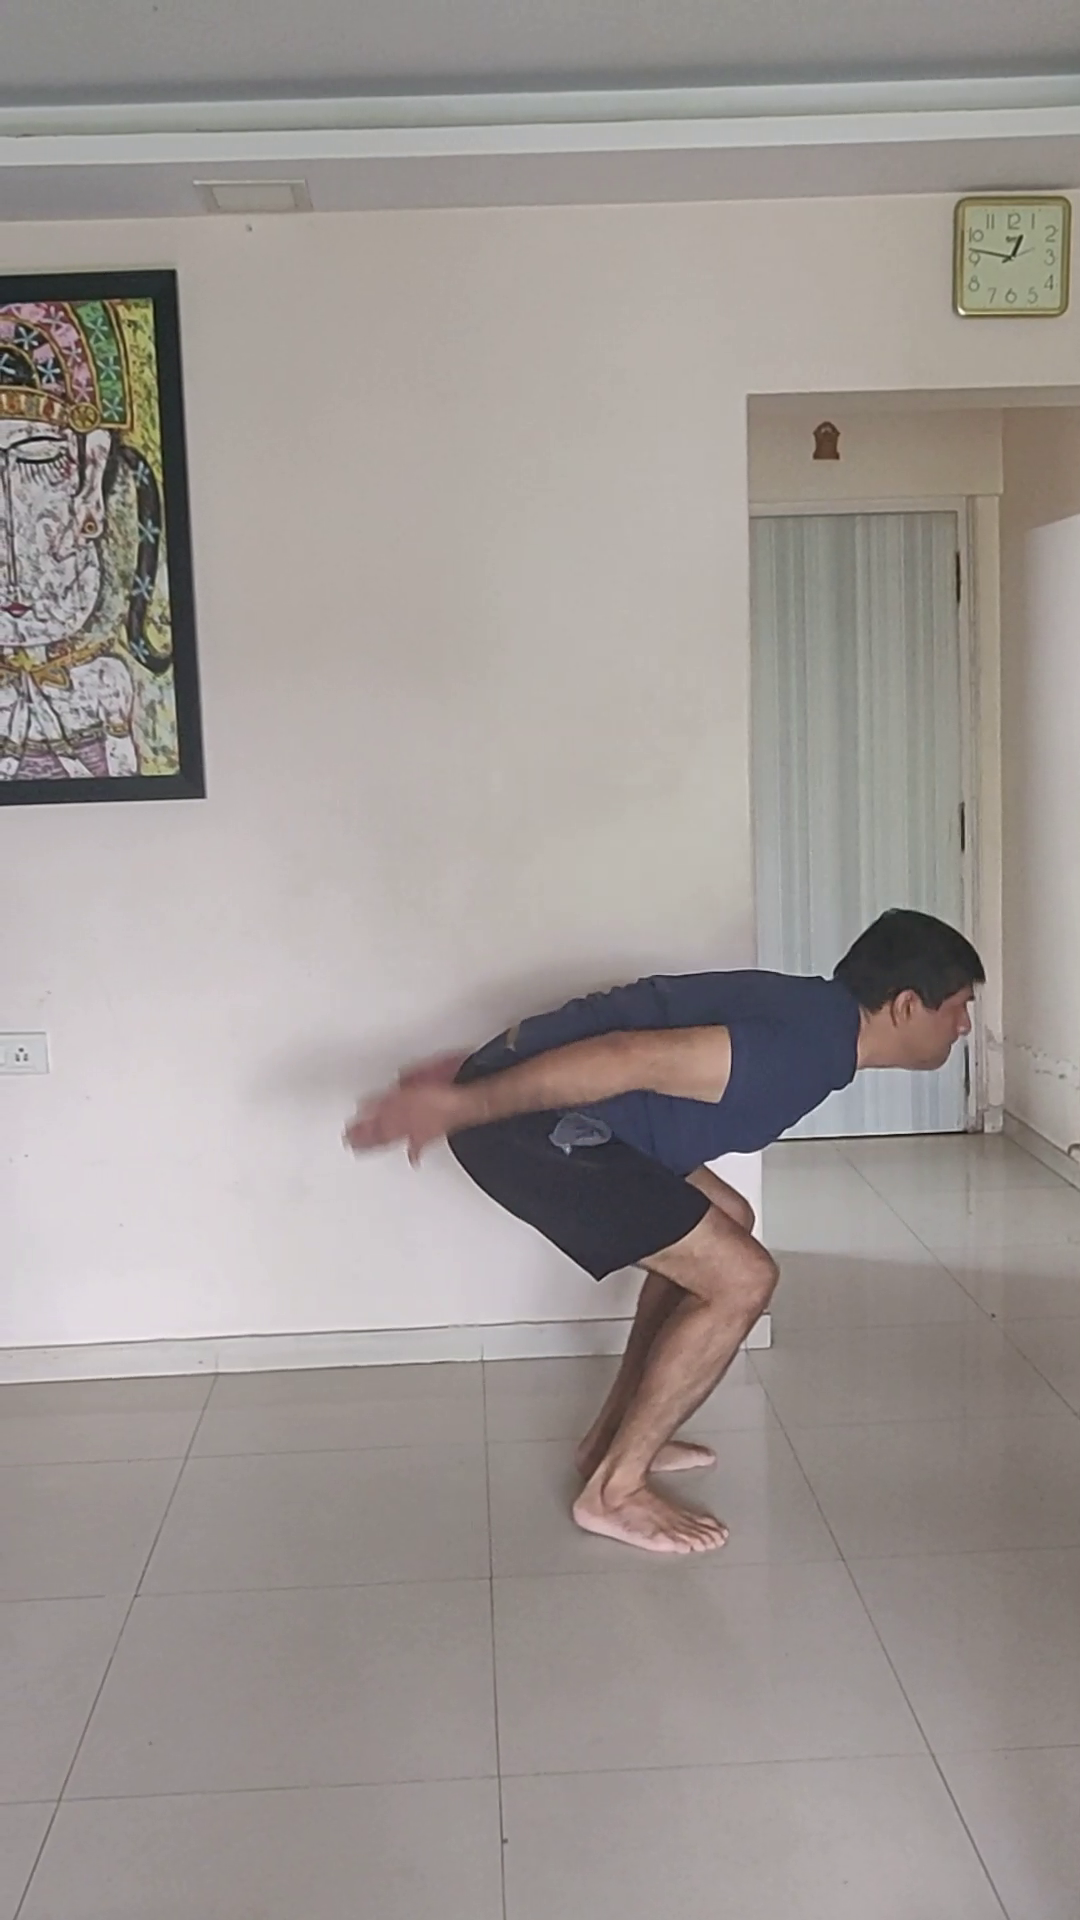

In [50]:
im = load_image((path/"test").ls()[-1])
im

In [61]:
# DON'T USE FOR LOOPS FOR PREDICTIONS IN BATCHES.

test_preds = pd.DataFrame(columns=["Filename", "Actual Category", "Predicted Category", "% prob 'jump_peak'", "% prob 'landing'", "% prob 'squat'", "% prob 'transition'"])

for i, img in enumerate((path/"test").ls()):
    test_preds.loc[i, "Filename"] = os.path.basename(img)
    test_preds.loc[i, "Actual Category"] = re.findall(r"jump_peak|landing|squat|transition", os.path.basename(img))[0]
    img_pred = learn_inf.predict(img)
    test_preds.loc[i, "Predicted Category"] = img_pred[0]
    test_preds.loc[i, "% prob 'jump_peak'"] = round(img_pred[-1][0].item() * 100, 2)
    test_preds.loc[i, "% prob 'landing'"] = round(img_pred[-1][1].item() * 100, 2)
    test_preds.loc[i, "% prob 'squat'"] = round(img_pred[-1][2].item() * 100, 2)
    test_preds.loc[i, "% prob 'transition'"] = round(img_pred[-1][3].item() * 100, 2)

In [62]:
test_preds

Filename Actual Category  \
0             20200918_161843_FRAME_111_transition.png      transition   
1                   20200918_161843_FRAME_51_squat.png           squat   
2               20200918_161843_FRAME_70_jump_peak.png       jump_peak   
3               20200918_161843_FRAME_74_jump_peak.png       jump_peak   
4              20200918_161923_FRAME_35_transition.png      transition   
..                                                 ...             ...   
193  VID_20201023_152447_PC new_FRAME_8_transition.png      transition   
194                        VID_GC 2_FRAME_19_squat.png           squat   
195                    VID_GC 2_FRAME_1_transition.png      transition   
196                    VID_GC 2_FRAME_31_jump_peak.png       jump_peak   
197                        VID_GC 2_FRAME_54_squat.png           squat   

    Predicted Category % prob 'jump_peak' % prob 'landing' % prob 'squat'  \
0           transition               0.01             0.04           0.03   
1                squat               0.07             0.18          96.97   
2            jump_peak              99.72             0.06           0.04   
3            jump_peak               98.3             0.26           0.09   
4           transition               1.13             0.88          11.27   
..                 ...                ...              ...            ...   
193         transition               0.03             0.23           0.17   
194              squat               0.01             0.08          99.08   
195         transition               0.29             0.39           0.45   
196          jump_peak              99.81             0.02           0.03   
197              squat               0.07              0.7          97.08   

    % prob 'transition'  
0                 99.92  
1                  2.78  
2                  0.18  
3                  1.36  
4                 86.72  
..                  ...  
193               99.56  
194                0.83  
195               98.88  
196                0.14  
197                2.15  

[198 rows x 7 columns]

In [63]:
os.makedirs("test_preds_csv", exist_ok=True)
test_preds.to_csv(os.path.join("test_preds_csv", "test_sm_"+os.path.basename(modeldir)+f"_s{seed}"+".csv"), index=False)

## EfficientNet

### Implementation of EfficientNet in PyTorch by *lukemelas* [\[Github Link\]](https://github.com/lukemelas/EfficientNet-PyTorch).

In [14]:
# from efficientnet_pytorch import EfficientNet
# efficient_net = EfficientNet.from_pretrained('efficientnet-b0')
# efficient_net

### Implementation of several architectures (including EfficientNet) in PyTorch by *rwightman* [\[Github Link\]](https://github.com/rwightman/pytorch-image-models) [\[Documentation\]](https://rwightman.github.io/pytorch-image-models/).

In [15]:
import timm
from pprint import pprint

print(f"timm : version {timm.__version__}")

timm : version 0.2.1


In [16]:
# List all available models in timm library.
model_names = timm.list_models(pretrained=True)
pprint(model_names)

['adv_inception_v3',
 'cspdarknet53',
 'cspresnet50',
 'cspresnext50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenetblur121d',
 'dla34',
 'dla46_c',
 'dla46x_c',
 'dla60',
 'dla60_res2net',
 'dla60_res2next',
 'dla60x',
 'dla60x_c',
 'dla102',
 'dla102x',
 'dla102x2',
 'dla169',
 'dpn68',
 'dpn68b',
 'dpn92',
 'dpn98',
 'dpn107',
 'dpn131',
 'ecaresnet50d',
 'ecaresnet50d_pruned',
 'ecaresnet101d',
 'ecaresnet101d_pruned',
 'ecaresnetlight',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b1_pruned',
 'efficientnet_b2',
 'efficientnet_b2_pruned',
 'efficientnet_b2a',
 'efficientnet_b3',
 'efficientnet_b3_pruned',
 'efficientnet_b3a',
 'efficientnet_es',
 'efficientnet_lite0',
 'ens_adv_inception_resnet_v2',
 'ese_vovnet19b_dw',
 'ese_vovnet39b',
 'fbnetc_100',
 'gluon_inception_v3',
 'gluon_resnet18_v1b',
 'gluon_resnet34_v1b',
 'gluon_resnet50_v1b',
 'gluon_resnet50_v1c',
 'gluon_resnet50_v1d',
 'gluon_resnet50_v1s',
 'gluon_resnet101_v1b',
 'gluon_

In [17]:
effnetb0_model = timm.create_model("efficientnet_b0", pretrained=True)

In [18]:
effnetb0_model

EfficientNet(
  (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): SwishMe()
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): SwishMe()
        (se): SqueezeExcite(
          (avg_pool): AdaptiveAvgPool2d(output_size=1)
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SwishMe()
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
   

### Model Setup

This model cannot be passed directly into the learner unlike the default fastai model.
This is because, as explained above, default fastai models are split into two different layer groups:
- Group 1: Our encoder, which is everything but the last layer of our original model.
- Group 2: Our head, which is a fastai version of a Linear layer plus a few extra bits.

However, this model from *timm* library does not have the head separated from the rest of the architecture.

**(Following steps taken from this [ARTICLE](https://walkwithfastai.com/vision.external.timm) and this [COLAB NOTEBOOK](https://colab.research.google.com/github/muellerzr/Practical-Deep-Learning-for-Coders-2.0/blob/master/Computer%20Vision/05_EfficientNet_and_Custom_Weights.ipynb#scrollTo=L-90Ann5s7Dh)).** Also, refer to this [THREAD on forums.fast.ai](https://forums.fast.ai/t/adding-efficientnet-to-fastai-vision/53371/57).

So, the following steps need to be taken to prepare this model before it can be passed into the fastai learner:
1. Pop the original head off (in this case the pooling and the linear layers) and define model "body" with the remaining layers (need to use the newly defined *create_timm_body()* function - as explained in the colab notebook).
2. Create new "head" with number of features same as in original head and number of classes according to use-case (use fastai's *create_head()* method).
3. Wrap the body and new head together.
4. Initialize the new head with weights.
5. Define a new *Learner* object (note: not *cnn_learner*) with para *splitter=default_split*. (*cnn_learner* is a type of learner in fastai's *Learner* library specifically catered for computer vision applications.)
6. Freeze the model using *learn.freeze()*.

In [19]:
# 1. Pop the original head off (in this case the pooling and the linear layers)
#    and define model "body" with the remaining layers.
        
def create_timm_body(arch:str, pretrained=True, cut=None, n_in=3):
    "Creates a body from any model in the `timm` library."
    model = timm.create_model(arch, pretrained=pretrained, num_classes=0, global_pool='')
    # _update_first_layer(model, n_in, pretrained)
    if cut is None:
        ll = list(enumerate(model.children()))
        cut = next(i for i,o in reversed(ll) if has_pool_type(o))
    if isinstance(cut, int): return nn.Sequential(*list(model.children())[:cut])
    elif callable(cut): return cut(model)
    else: raise NamedError("cut must be either integer or function")

In [20]:
effnetb0_body = create_timm_body("efficientnet_b0", pretrained=True)

In [21]:
len(effnetb0_body)

7

In [22]:
effnetb0_body

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): SwishMe()
  (3): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): SwishMe()
        (se): SqueezeExcite(
          (avg_pool): AdaptiveAvgPool2d(output_size=1)
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SwishMe()
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
    )
    (1): 

In [23]:
# 2. Create new "head" with number of features same as in original head and number of classes according to use-case.

nf = num_features_model(effnetb0_body)*2   # *2 because it is a pooling layer.
nf

2560

In [24]:
effnetb0_head = create_head(nf, dls.c)

In [25]:
effnetb0_head

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten(full=False)
  (2): BatchNorm1d(2560, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=2560, out_features=512, bias=False)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=2, bias=False)
)

In [26]:
# 3. Wrap the body and new head together.

effnetb0_model = nn.Sequential(effnetb0_body, effnetb0_head)

In [27]:
# 4. Initialize the new head with weights.

apply_init(effnetb0_model[1], nn.init.kaiming_normal_)

In [28]:
len(effnetb0_model)

2

In [29]:
# Reduce batch size from 32 (above) to 16 --> EfficientNet model training is heavier, GPU runs out of memory. 

dls = data_block.dataloaders(path/"train", num_workers=0, bs=16, valid_pct=0.2)    # valid_pct=0.2 by default

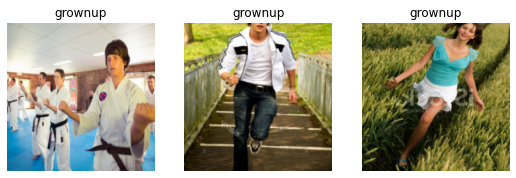

In [30]:
dls.show_batch(nrows=1, ncols=3)

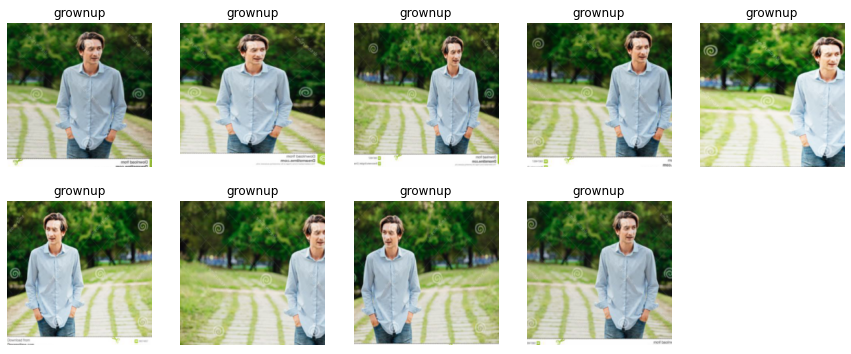

In [31]:
dls.show_batch(nrows=2, ncols=5, unique=True)

In [33]:
# 5. Define a new Learner object (note: not cnn_learner) with para splitter=default_split.

model = "efficientnetb0"
get_modeldir = partial(get_modeldir, model=model, experiment='_ini0_', ver=1)
modeldir = get_modeldir()

effnetb0_learn = Learner(dls, effnetb0_model, metrics=error_rate, model_dir=modeldir, splitter=default_split)

In [34]:
# 6. Freeze the model using learn.freeze().

effnetb0_learn.freeze()

In [35]:
effnetb0_learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SwishMe()
    (3): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act1): SwishMe()
          (se): SqueezeExcite(
            (avg_pool): AdaptiveAvgPool2d(output_size=1)
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SwishMe()
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          )
          (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

In [36]:
len(effnetb0_learn.model)

2

In [37]:
effnetb0_learn.summary()

Sequential (Input shape: ['16 x 3 x 224 x 224'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               16 x 32 x 112 x 112  864        False     
________________________________________________________________
BatchNorm2d          16 x 32 x 112 x 112  64         True      
________________________________________________________________
SwishMe              16 x 32 x 112 x 112  0          False     
________________________________________________________________
Conv2d               16 x 32 x 112 x 112  288        False     
________________________________________________________________
BatchNorm2d          16 x 32 x 112 x 112  64         True      
________________________________________________________________
SwishMe              16 x 32 x 112 x 112  0          False     
________________________________________________________________
AdaptiveAvgPool2d    16 x 32 x 1 x 1      0          False     
_________________________________________________

In [23]:
unfrozen_params = filter(lambda p: not p.requires_grad, learn.model.parameters())
unfrozen_params = sum([np.prod(p.size()) for p in unfrozen_params])
model_parameters = filter(lambda p: p.requires_grad, learn.model.parameters())
frozen_params = sum([np.prod(p.size()) for p in model_parameters])

print(f"ResNet34 model\nTrainable params: {unfrozen_params}\nNon-trainable params: {frozen_params}")

ResNet34 model
Trainable params: 21267648
Non-trainable params: 545408


In [39]:
unfrozen_params = filter(lambda p: not p.requires_grad, effnetb0_learn.model.parameters())
unfrozen_params = sum([np.prod(p.size()) for p in unfrozen_params])
model_parameters = filter(lambda p: p.requires_grad, effnetb0_learn.model.parameters())
frozen_params = sum([np.prod(p.size()) for p in model_parameters])

print(f"EfficientNet_b0 model\nTrainable params: {unfrozen_params}\nNon-trainable params: {frozen_params}")

EfficientNet_b0 model
Trainable params: 3965532
Non-trainable params: 1359904


### ALTERNATE Model Setup

**Alternatively, model setup can be done using *wwf* library as described in this [ARTICLE](https://walkwithfastai.com/vision.external.timm).**

Install *wwf* library using ```pip install wwf```.

In [14]:
from wwf.vision.timm import *

In [15]:
# Reduce batch size from 32 (above) to 16 --> EfficientNet model training is heavier, GPU runs out of memory. 

dls = data_block.dataloaders(path/"train", num_workers=0, bs=16, valid_pct=0.2)    # valid_pct=0.2 by default

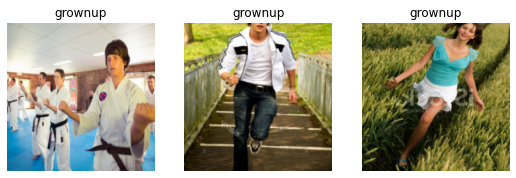

In [16]:
dls.show_batch(nrows=1, ncols=3)

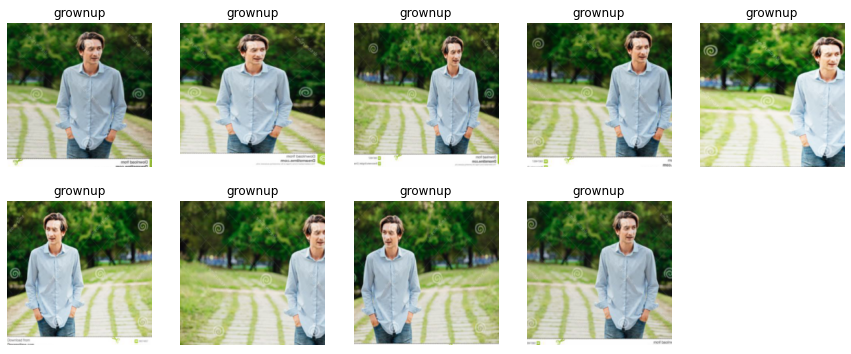

In [17]:
dls.show_batch(nrows=2, ncols=5, unique=True)

In [19]:
modeldir = get_modeldir(ver=2)

model = "efficientnet_b0"
get_modeldir = partial(get_modeldir, model=model, experiment='_ini0_', ver=2)
modeldir = get_modeldir()

effnetb0_learn = timm_learner(dls, "efficientnet_b0", metrics=error_rate, model_dir=modeldir)

In [20]:
effnetb0_learn.summary()

Sequential (Input shape: ['16 x 3 x 224 x 224'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               16 x 32 x 112 x 112  864        False     
________________________________________________________________
BatchNorm2d          16 x 32 x 112 x 112  64         True      
________________________________________________________________
SwishMe              16 x 32 x 112 x 112  0          False     
________________________________________________________________
Conv2d               16 x 32 x 112 x 112  288        False     
________________________________________________________________
BatchNorm2d          16 x 32 x 112 x 112  64         True      
________________________________________________________________
SwishMe              16 x 32 x 112 x 112  0          False     
________________________________________________________________
AdaptiveAvgPool2d    16 x 32 x 1 x 1      0          False     
_________________________________________________

In [21]:
unfrozen_params = filter(lambda p: not p.requires_grad, effnetb0_learn.model.parameters())
unfrozen_params = sum([np.prod(p.size()) for p in unfrozen_params])
model_parameters = filter(lambda p: p.requires_grad, effnetb0_learn.model.parameters())
frozen_params = sum([np.prod(p.size()) for p in model_parameters])

print(f"EfficientNet_b0 model\nTrainable params: {unfrozen_params}\nNon-trainable params: {frozen_params}")

EfficientNet_b0 model
Trainable params: 3965532
Non-trainable params: 1359904


In [22]:
effnetb0_learn.fine_tune(2)

In [23]:
effnetb0_interp = ClassificationInterpretation.from_learner(effnetb0_learn)

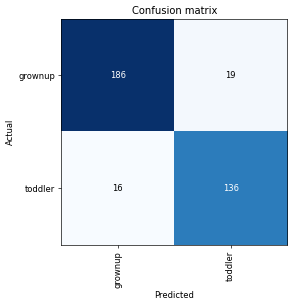

In [24]:
effnetb0_interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [25]:
effnetb0_interp.most_confused()

[('grownup', 'toddler', 19), ('toddler', 'grownup', 16)]

Minimum/10: 1.74e-02, steepest point: 9.12e-07


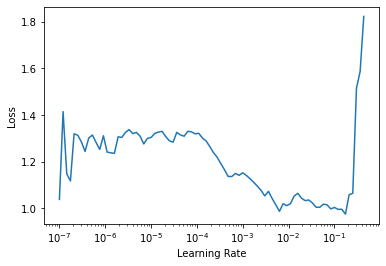

In [26]:
modeldir = get_modeldir(ver=3)

effnetb0_learn = timm_learner(dls, "efficientnet_b0", metrics=error_rate, model_dir=modeldir)
lr_min, lr_steep = effnetb0_learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [27]:
modeldir = get_modeldir(ver=4)

callbacks = [SaveModelCallback(monitor='accuracy', fname=modeldir+"_savemodel")]
effnetb0_learn.callbacks = callbacks

effnetb0_learn = timm_learner(dls, "efficientnet_b0", metrics=error_rate, model_dir=modeldir)
effnetb0_learn.fine_tune(10, base_lr=1e-2)

**Higher ```error_rate``` than ResNet34 model (3.6%), and validation loss is higher than train loss which might indicate over-fitting.**

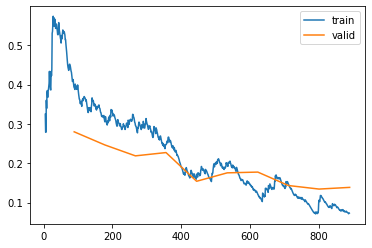

In [28]:
effnetb0_learn.recorder.plot_loss()

In [29]:
preds, y, losses = effnetb0_learn.get_preds(with_loss=True)

In [30]:
preds.shape

torch.Size([357, 2])

In [31]:
y.shape

torch.Size([357])

In [32]:
losses.shape

torch.Size([357])

In [33]:
effnetb0_interp = ClassificationInterpretation.from_learner(effnetb0_learn)

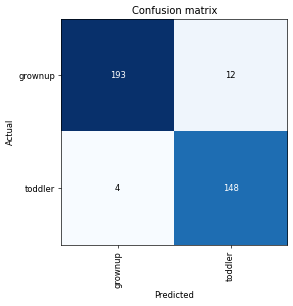

In [34]:
effnetb0_interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

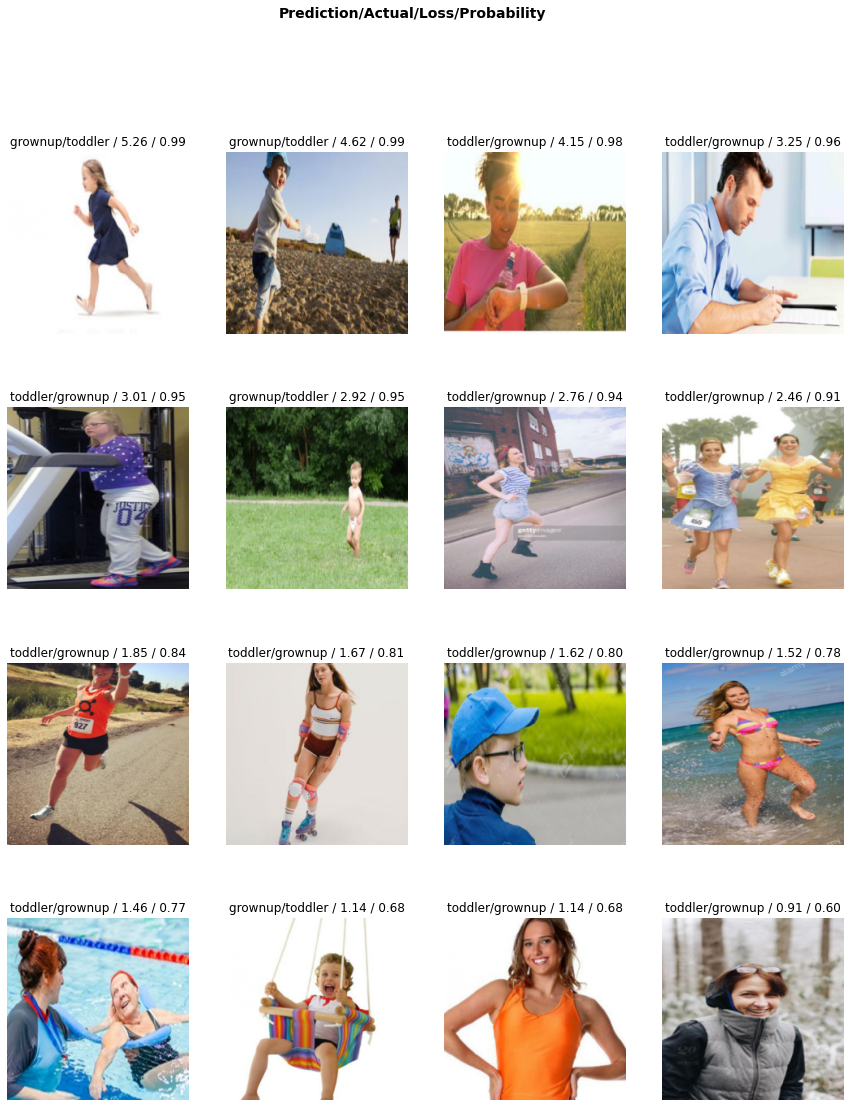

In [35]:
effnetb0_interp.plot_top_losses(16, figsize=(15, 18))

In [36]:
effnetb0_learn.export(fname=f"{modeldir}.pkl")

Model pickle filesize
- ResNet34 : 83.5MB
- EfficientNet_b0 : 20.9MB

Model error_rate
- ResNet34 : 3.64%
- EfficientNet_b0 : 4.48%

In [37]:
effnetb0_learn_inf = load_learner(f"{modeldir}.pkl")

In [38]:
effnetb0_learn_inf.dls.vocab

['grownup', 'toddler']

In [39]:
effnetb0_learn_inf.predict((path/"test").ls()[0])

('toddler', tensor(1), tensor([0.0018, 0.9982]))

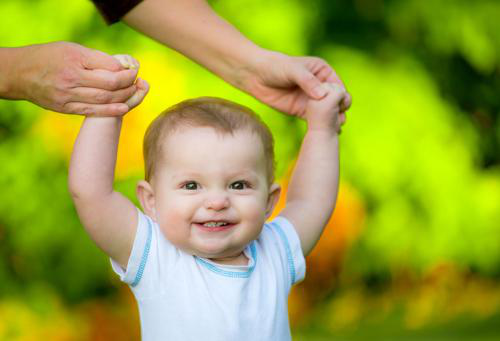

In [40]:
im = load_image((path/"test").ls()[0])
im

In [41]:
effnetb0_learn_inf.predict((path/"test").ls()[-1])

('grownup', tensor(0), tensor([9.9984e-01, 1.5790e-04]))

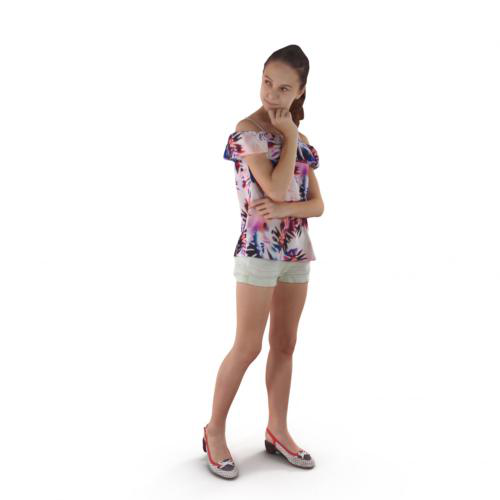

In [42]:
im = load_image((path/"test").ls()[-1])
im

In [43]:
test_preds = pd.DataFrame(columns=["Filename", "Predicted Category", "% prob 'grownup'", "% prob 'toddler'"])

for i, img in enumerate((path/"test").ls()):
    test_preds.loc[i, "Filename"] = os.path.basename(img)
    img_pred = effnetb0_learn_inf.predict(img)
    test_preds.loc[i, "Predicted Category"] = img_pred[0]
    test_preds.loc[i, "% prob 'grownup'"] = round(img_pred[-1][0].item() * 100, 2)
    test_preds.loc[i, "% prob 'toddler'"] = round(img_pred[-1][1].item() * 100, 2)

test_preds

Filename Predicted Category % prob 'grownup' % prob 'toddler'
0     1009.jpg            toddler             0.18            99.82
1     1017.jpg            toddler             5.77            94.23
2     1175.jpg            toddler             8.13            91.87
3     2104.jpg            toddler              0.1             99.9
4     2122.jpg            toddler             0.01            99.99
5     3007.jpg            toddler             0.65            99.35
6     3012.jpg            toddler                0              100
7     3023.jpg            toddler                0              100
8     3036.jpg            toddler             0.02            99.98
9     3087.jpg            toddler             0.83            99.17
10   g1030.jpg            grownup              100                0
11   g1049.jpg            grownup              100                0
12   g2092.jpg            toddler             35.2             64.8
13  g3023.jpeg            grownup            99.56             0.44
14   g3027.jpg            grownup            99.99             0.01
15   g3106.jpg            grownup            99.99             0.01
16   g3174.jpg            toddler             41.2             58.8
17   g3227.jpg            grownup            99.93             0.07
18   g4013.jpg            grownup              100                0
19   g4027.jpg            grownup            99.98             0.02

**EfficientNet_b0 model gave 2 wrong predictions on test set as compared to 0 wrong predictions from the ResNet34 model.**

**Indicates over-fitting on training set as explained earlier. EfficientNet model needs more optimization.**

In [44]:
os.makedirs("test_preds_csv", exist_ok=True)
test_preds.to_csv(os.path.join("test_preds_csv", "test_sm_"+os.path.basename(modeldir)+f"_s{seed}"+".csv"), index=False)